In [1]:
import pandas as pd
import missingno as mn
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime
matplotlib.rcParams['figure.figsize'] = [20, 10]
pd.set_option('display.max_columns', 500)

In [2]:
all_data = pd.read_csv('world_bank_data.csv', low_memory=False, thousands=',')

In [55]:
all_data.head()

,id,regionname,countryname,prodline,lendinginstr,lendinginstrtype,envassesmentcategorycode,supplementprojectflg,productlinetype,projectstatusdisplay,status,project_name,boardapprovaldate,board_approval_month,closingdate,lendprojectcost,ibrdcommamt,idacommamt,totalamt,grantamt,borrower,impagency,url,projectdoc,majorsector_percent,sector1,sector2,sector3,sector4,sector5,sector,mjsector1,mjsector2,mjsector3,mjsector4,mjsector5,mjsector,theme1,theme2,theme3,theme4,theme5,theme,goal,financier,mjtheme1name,mjtheme2name,mjtheme3name,mjtheme4name,mjtheme5name,location,GeoLocID,GeoLocName,Latitude,Longitude,Country,Unnamed: 56
0,P160543,East Asia and Pacific,Socialist Republic of Vietnam;Socialist Republ...,RE,Investment Project Financing,IN,C,N,L,NaN,NaN,Quality Deaf Education in Vietnam,2018-05-31T00:00:00Z,May,NaN,3000000.0,0,0,0,3000000,NaN,NaN,http://projects.worldbank.org/P160543?lang=en,NaN,NaN,!$!0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Education for all!$!70!$!65,Education for the knowledge economy!$!30!$!66,NaN,NaN,NaN,NaN,Corporate Advocacy Priorities|Millennium Devel...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,P163515,Africa,Republic of Uganda;Republic of Uganda,PE,Program-for-Results,PR,NaN,Y,L,Active,Active,Uganda Support to Municipal Infrastructure Dev...,2018-05-15T00:00:00Z,May,NaN,360000000.0,0,360000000,360000000,0,PEPULIC,IIST,http://projects.worldbank.org/P163515?lang=en,NaN,NaN,!$!0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,!$!0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,P160504,East Asia and Pacific,Republic of Palau;Republic of Palau,RE,Investment Project Financing,IN,C,N,L,NaN,NaN,Palau: ICT Sector Technical Assistance,2018-03-30T00:00:00Z,March,NaN,1550000.0,0,0,0,1100000,NaN,NaN,http://projects.worldbank.org/P160504?lang=en,NaN,NaN,!$!0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,State-owned enterprise restructuring and priva...,Micro; Small and Medium Enterprise support!$!2...,Regulation and competition policy!$!25!$!40,Infrastructure services for private sector dev...,NaN,NaN,Corporate Advocacy Priorities;Corporate Advoca...,NaN,NaN,NaN,NaN,NaN,NaN,0004037892!$!State of Koror!$!7.3390002!$!134....,0004037892,State of Koror,7.3390002,134.4785,PW,NaN
3,P157987,South Asia,People's Republic of Bangladesh;People's Repub...,PE,Investment Project Financing,IN,C,N,L,Active,Active,National Strategy for Development of Statistic...,2018-03-29T00:00:00Z,March,2022-02-28T00:00:00Z,18000000.0,0,15000000,15000000,0,EET,ALAESH,http://projects.worldbank.org/P157987?lang=en,NaN,NaN,!$!0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,!$!0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,P158364,South Asia,Nepal;Nepal,PE,Investment Project Financing,IN,B,N,L,Active,Active,NP Modernization of Rani Jamara Kulariya Irrig...,2018-03-29T00:00:00Z,March,2023-12-31T00:00:00Z,72000000.0,0,66000000,66000000,0,IIST,EPATET,http://projects.worldbank.org/P158364?lang=en,NaN,NaN,!$!0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Decentralization!$!10!$!26,Rural services and infrastructure!$!40!$!78,Water resource management!$!50!$!85,NaN,NaN,NaN,Corporate Advocacy Priorities;Corporate Advoca...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
rel_data = all_data[['id','regionname','countryname','lendinginstr','projectstatusdisplay','boardapprovaldate','lendprojectcost', 'sector','mjsector', 'project_name']]


In [ ]:
temp_data = all_data[['regionname','countryname','boardapprovaldate','lendprojectcost','project_name']]
temp_data.head()

In [ ]:
rel_data.head()

In [113]:
pd.value_counts(rel_data['regionname'])

Africa                          5633
Latin America and Caribbean     3306
East Asia and Pacific           2888
Europe and Central Asia         2471
South Asia                      2204
Middle East and North Africa    1484
Other                            106
Name: regionname, dtype: int64

In [20]:
pd.value_counts(rel_data['countryname'])

Republic of India;Republic of India                                                  779
Republic of Indonesia;Republic of Indonesia                                          568
People's Republic of China;People's Republic of China                                564
Federative Republic of Brazil;Federative Republic of Brazil                          528
Islamic Republic of Pakistan;Islamic Republic of Pakistan                            421
People's Republic of Bangladesh;People's Republic of Bangladesh                      369
United Mexican States;United Mexican States                                          327
Republic of the Philippines;Republic of the Philippines                              305
Republic of Colombia;Republic of Colombia                                            284
United Republic of Tanzania;United Republic of Tanzania                              281
Republic of Kenya;Republic of Kenya                                                  269
Socialist Republic of

In [ ]:
pd.value_counts(rel_data['lendinginstr'])

In [ ]:
pd.value_counts(rel_data['projectstatusdisplay'])

In [ ]:
pd.value_counts(rel_data['lendprojectcost'])

In [ ]:
all_data.loc[all_data['lendprojectcost'] == 0]

In [ ]:
pd.value_counts(rel_data['mjsector'])

In [ ]:
pd.value_counts(rel_data['boardapprovaldate'])

In [4]:
rel_data['boardapprovaldate'] = pd.to_datetime(rel_data['boardapprovaldate'])

/Users/vaidehidalmia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [5]:
rel_data['year'] = rel_data['boardapprovaldate'].dt.year
rel_data['month'] = rel_data['boardapprovaldate'].dt.month

/Users/vaidehidalmia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/vaidehidalmia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [ ]:
pd.value_counts(rel_data['year'])

In [ ]:
pd.value_counts(rel_data['month'])

In [ ]:
pd.value_counts(rel_data['year']).sort_index().plot()
plt.show()

In [ ]:
rel_data.groupby("year").sum()['lendprojectcost'].sort_index().plot()
plt.show()

In [ ]:
pd.value_counts(rel_data['month']).sort_index().plot()
plt.show()

In [ ]:
rel_data.groupby("regionname").sum()['lendprojectcost'].sort_index().plot.bar()
plt.show()

In [ ]:
rel_data.groupby("countryname").sum()['lendprojectcost'].sort_index().plot.bar()
plt.show()

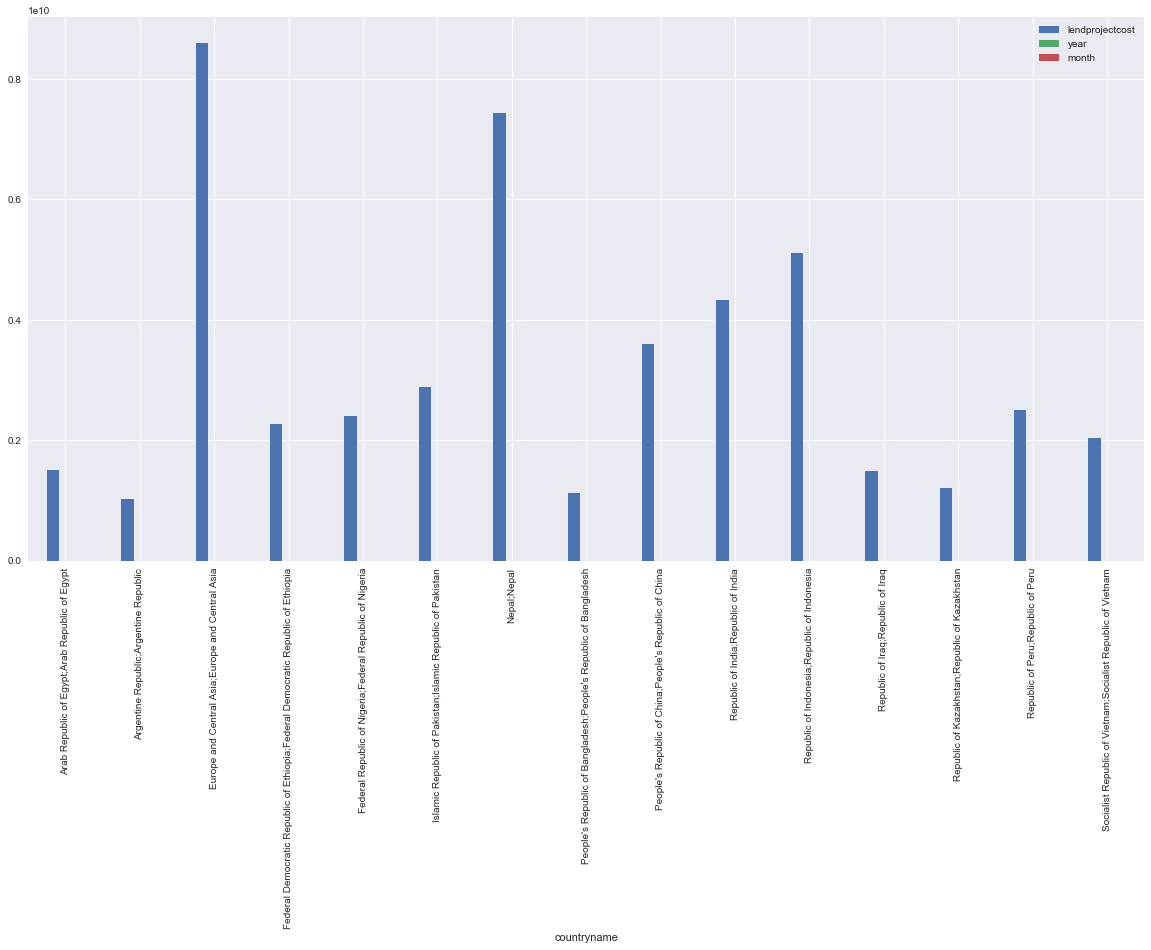

In [28]:
country_money_sum = rel_data[rel_data['year']==2016].groupby("countryname").sum()
country_money_sum[country_money_sum['lendprojectcost'] >= 1e+9].sort_index().plot.bar()
plt.show()

In [ ]:
all_data.loc[all_data['lendprojectcost'] >= 1e+9]

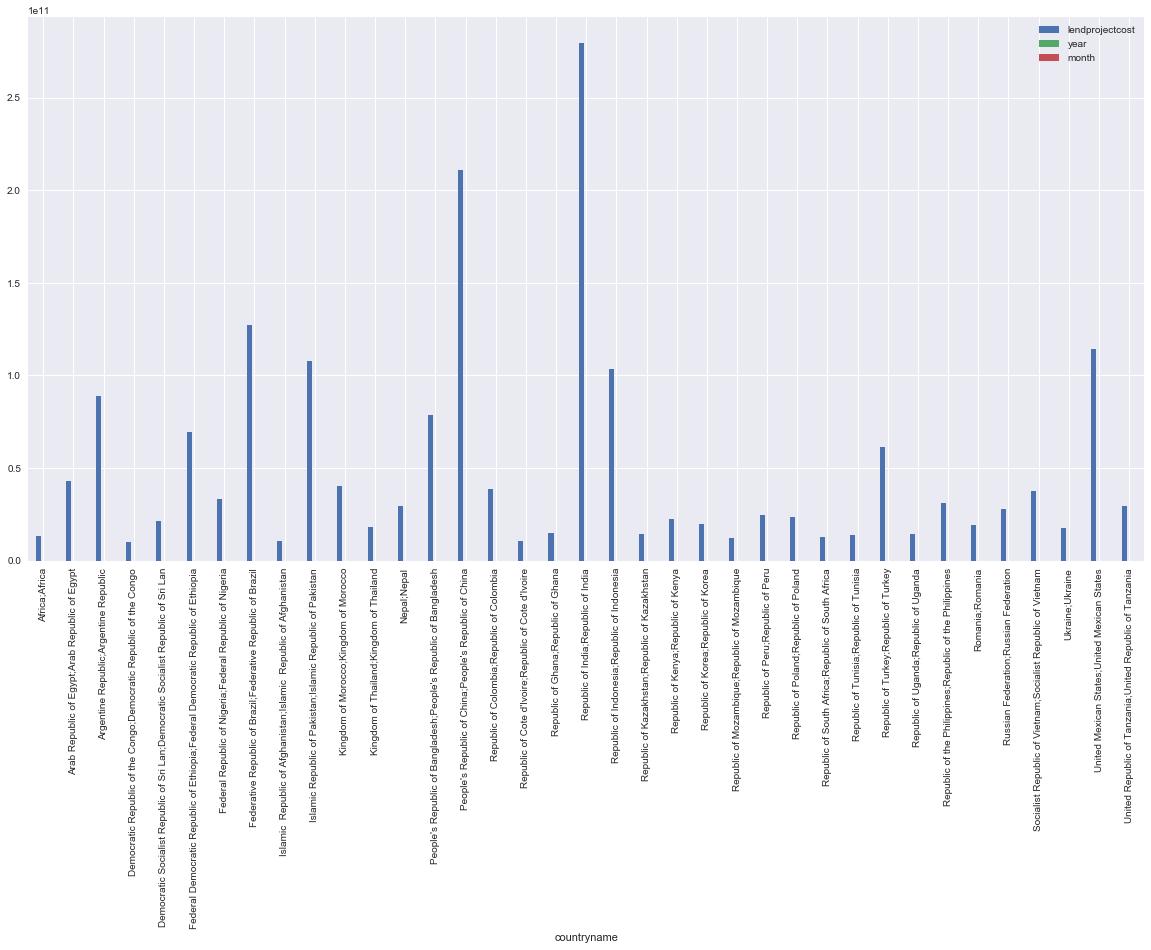

In [8]:
country_money_sum = rel_data.groupby("countryname").sum()
country_money_sum[country_money_sum['lendprojectcost'] >= 1e+10].sort_index().plot.bar()
plt.show()

In [27]:
pd.value_counts(rel_data.loc[rel_data['year'] == 2015]['countryname'])

Republic of India;Republic of India                                              16
Islamic Republic of Pakistan;Islamic Republic of Pakistan                        13
People's Republic of China;People's Republic of China                            13
Africa;Africa                                                                    11
Kingdom of Morocco;Kingdom of Morocco                                            11
Western Africa;Western Africa                                                     9
Socialist Republic of Vietnam;Socialist Republic of Vietnam                       9
People's Republic of Bangladesh;People's Republic of Bangladesh                   9
Republic of Kenya;Republic of Kenya                                               9
West Bank and Gaza;West Bank and Gaza                                             8
Republic of Mozambique;Republic of Mozambique                                     8
Republic of Albania;Republic of Albania                                     

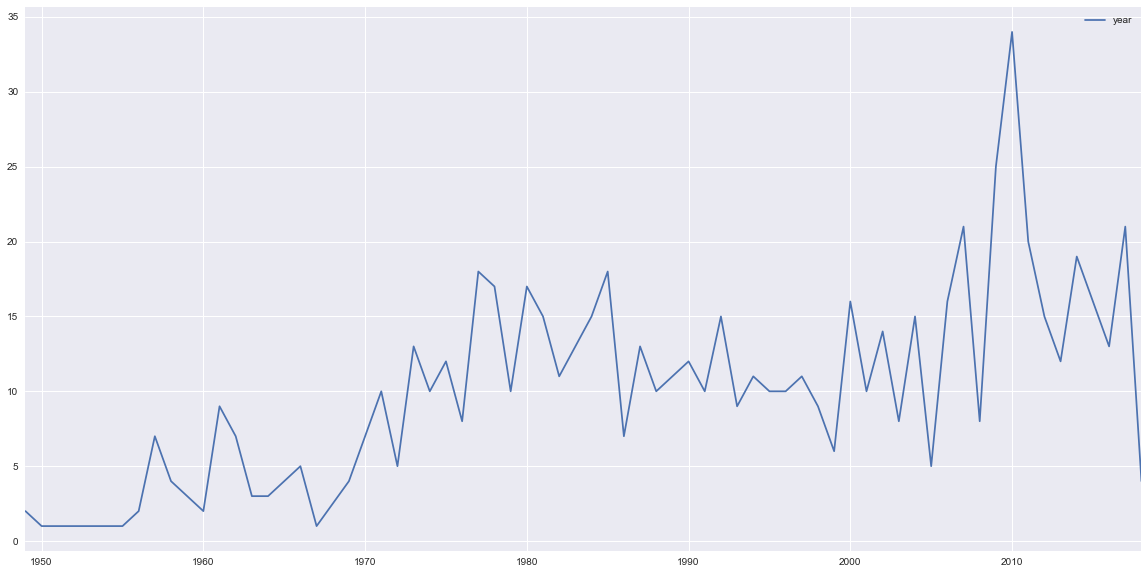

In [124]:
pd.value_counts(rel_data[rel_data['countryname']=='Republic of India;Republic of India']['year']).sort_index().plot()
# pd.value_counts(rel_data[rel_data['countryname']=='Nepal;Nepal']['year']).sort_index().plot()
# pd.value_counts(rel_data[rel_data['countryname']=='Islamic Republic of Pakistan;Islamic Republic of Pakistan']['year']).sort_index().plot()
# pd.value_counts(rel_data[rel_data['countryname']=='Republic of Indonesia;Republic of Indonesia']['year']).sort_index().plot()
# pd.value_counts(rel_data[rel_data['countryname']=='People\'s Republic of China;People\'s Republic of China']['year']).sort_index().plot()
# pd.value_counts(rel_data[rel_data['countryname']=='Federative Republic of Brazil;Federative Republic of Brazil']['year']).sort_index().plot()
plt.legend()
plt.show()


In [ ]:
pd.value_counts(rel_data['project_name'])

In [22]:
for i in rel_data['countryname']:
    pd.value_counts(rel_data[rel_data['countryname']==i]['year']).sort_index().plot()

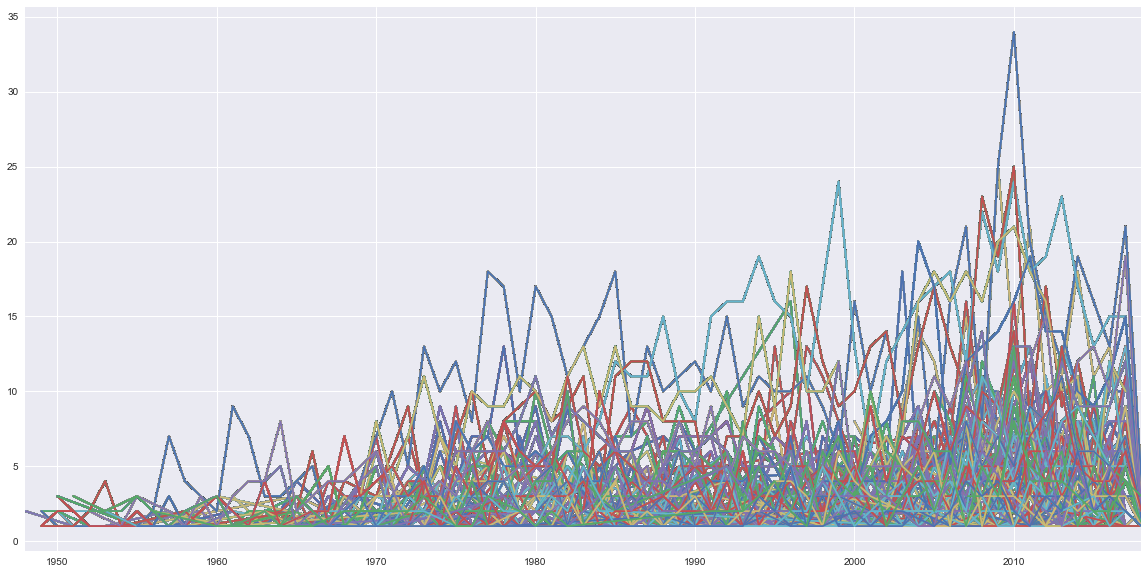

In [23]:
plt.show()

In [21]:
rel_data['countryname'][:10]

0    Socialist Republic of Vietnam;Socialist Republ...
1                Republic of Uganda;Republic of Uganda
2                  Republic of Palau;Republic of Palau
3    People's Republic of Bangladesh;People's Repub...
4                                          Nepal;Nepal
5                Republic of Angola;Republic of Angola
6        Republic of Uzbekistan;Republic of Uzbekistan
7                Republic of Serbia;Republic of Serbia
8            Republic of Colombia;Republic of Colombia
9    Islamic Republic of Pakistan;Islamic Republic ...
Name: countryname, dtype: object

In [37]:
rel_data[rel_data['year']==2016].groupby("countryname").sum()

,lendprojectcost,year,month
countryname,,,
Africa;Africa,6.375000e+08,26208.0,79.0
Arab Republic of Egypt;Arab Republic of Egypt,1.500000e+09,4032.0,21.0
Argentine Republic;Argentine Republic,1.021000e+09,8064.0,30.0
Belize;Belize,NaN,2016.0,9.0
Bosnia and Herzegovina;Bosnia and Herzegovina,1.013000e+08,2016.0,8.0
Burkina Faso;Burkina Faso,2.782000e+08,12096.0,40.0
Caribbean;Caribbean,4.420000e+06,4032.0,7.0
Central African Republic;Central African Republic,2.490000e+07,4032.0,16.0
Democratic Republic of Sao Tome and Prin;Democratic Republic of Sao Tome and Prin,3.460000e+07,6048.0,30.0


In [50]:
pd.DataFrame({'lendprojectcost' : rel_data[rel_data['year']==2016].groupby("countryname").sum()['lendprojectcost']})

,lendprojectcost
countryname,
Africa;Africa,6.375000e+08
Arab Republic of Egypt;Arab Republic of Egypt,1.500000e+09
Argentine Republic;Argentine Republic,1.021000e+09
Belize;Belize,NaN
Bosnia and Herzegovina;Bosnia and Herzegovina,1.013000e+08
Burkina Faso;Burkina Faso,2.782000e+08
Caribbean;Caribbean,4.420000e+06
Central African Republic;Central African Republic,2.490000e+07
Democratic Republic of Sao Tome and Prin;Democratic Republic of Sao Tome and Prin,3.460000e+07


In [47]:
rel_data[rel_data['year']==2016].groupby("countryname").sum()['lendprojectcost']

637500000.0

In [56]:
pd.value_counts(all_data['lendinginstr'])

Specific Investment Loan                   7632
Investment Project Financing               3207
Technical Assistance Loan                  1621
Sector Investment and Maintenance Loan     1260
Development Policy Lending                  854
Financial Intermediary Loan                 807
Emergency Recovery Loan                     582
Structural Adjustment Loan                  541
Adaptable Program Loan                      517
Sector Adjustment Loan                      365
Learning and Innovation Loan                172
Program-for-Results                         116
Programmatic Structural Adjustment Loan      51
UNIDENTIFIED                                 45
Poverty Reduction Support Credit             40
Rehabilitation Loan                          22
Debt and Debt Service Reduction Loan         13
Special Structural Adjustment Loan            2
Name: lendinginstr, dtype: int64

In [59]:
pd.value_counts(all_data[all_data['countryname']=='Republic of India;Republic of India']['lendinginstr'])

Specific Investment Loan                   403
Investment Project Financing               141
Sector Investment and Maintenance Loan      87
Financial Intermediary Loan                 45
Technical Assistance Loan                   36
Structural Adjustment Loan                  16
Program-for-Results                         14
Development Policy Lending                  10
Emergency Recovery Loan                      6
Adaptable Program Loan                       5
Programmatic Structural Adjustment Loan      4
Sector Adjustment Loan                       4
Name: lendinginstr, dtype: int64

In [61]:
pd.value_counts(all_data[all_data['countryname']=='Nepal;Nepal']['lendinginstr'])

Specific Investment Loan                  89
Investment Project Financing              41
Technical Assistance Loan                 14
Sector Investment and Maintenance Loan    13
Emergency Recovery Loan                    6
Development Policy Lending                 4
Program-for-Results                        4
Financial Intermediary Loan                4
Learning and Innovation Loan               3
Structural Adjustment Loan                 2
Adaptable Program Loan                     1
Poverty Reduction Support Credit           1
Name: lendinginstr, dtype: int64

In [64]:
pd.value_counts(rel_data[rel_data['year']==1996]['lendinginstr'])

Specific Investment Loan                  210
Technical Assistance Loan                  29
Structural Adjustment Loan                 26
Sector Adjustment Loan                     21
Emergency Recovery Loan                    14
Sector Investment and Maintenance Loan     13
Financial Intermediary Loan                 6
Rehabilitation Loan                         2
Debt and Debt Service Reduction Loan        1
Name: lendinginstr, dtype: int64

In [84]:
pd.value_counts(rel_data[rel_data['lendinginstr']=='Investment Project Financing']['year']).sort_index().plot()
pd.value_counts(rel_data[rel_data['lendinginstr']=='Program-for-Results']['year']).sort_index().plot()
pd.value_counts(rel_data[rel_data['lendinginstr']=='Specific Investment Loan']['year']).sort_index().plot()
pd.value_counts(rel_data[rel_data['lendinginstr']=='Structural Adjustment Loan']['year']).sort_index().plot()
pd.value_counts(rel_data[rel_data['lendinginstr']=='Financial Intermediary Loan']['year']).sort_index().plot()
pd.value_counts(rel_data[rel_data['lendinginstr']=='Sector Investment and Maintenance Loan']['year']).sort_index().plot()

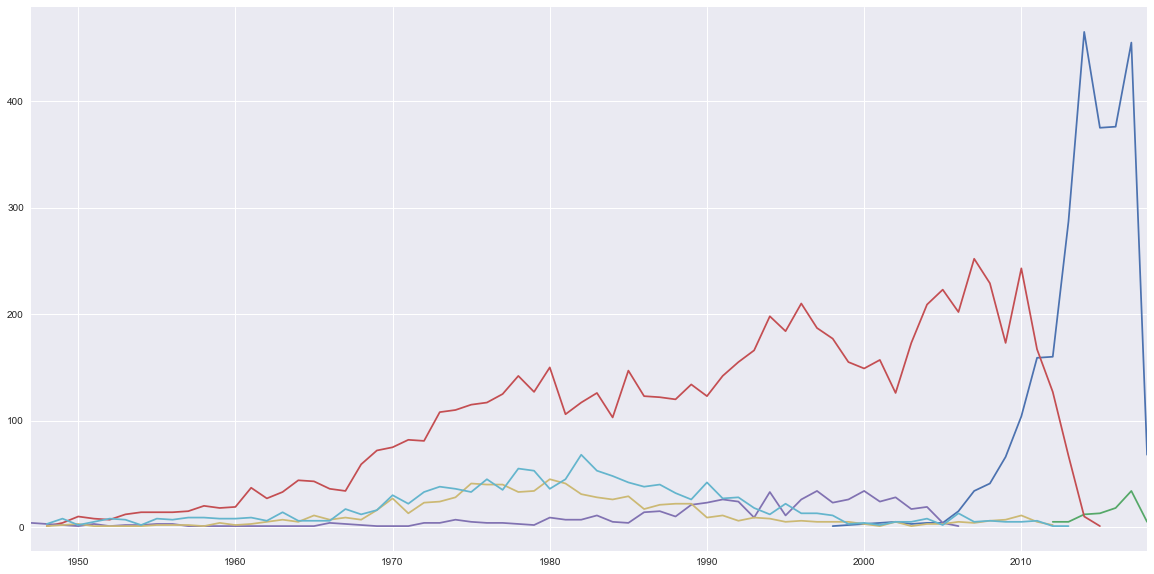

In [85]:
plt.show()

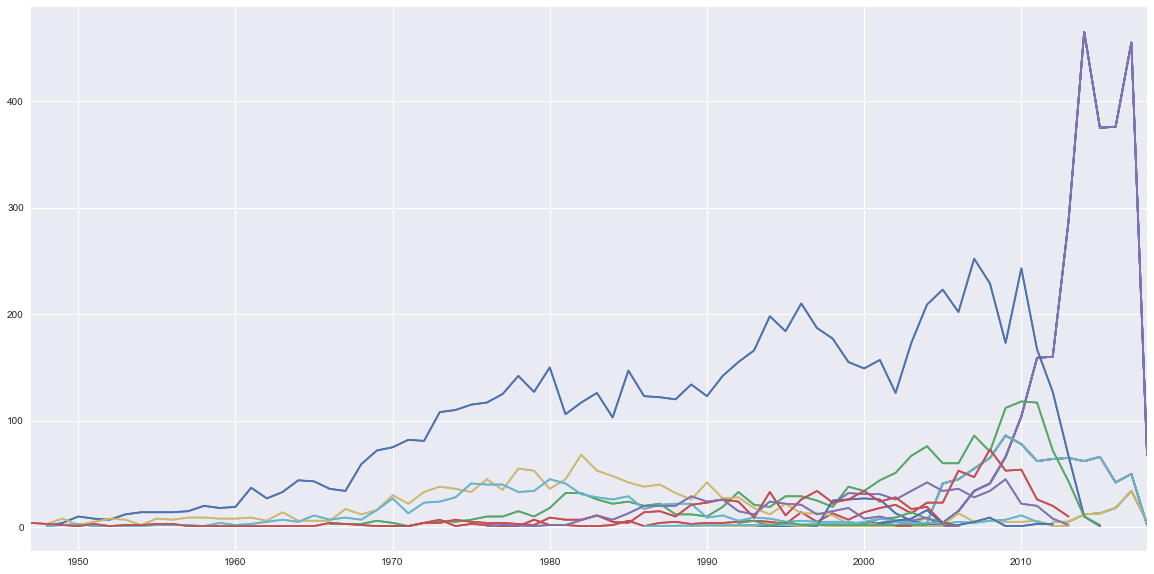

In [102]:
for i in rel_data['lendinginstr'].unique():
    x = pd.value_counts(rel_data[rel_data['lendinginstr']==i]['year']).sort_index()
    if(x.any()):
        x.plot()
        
plt.show()

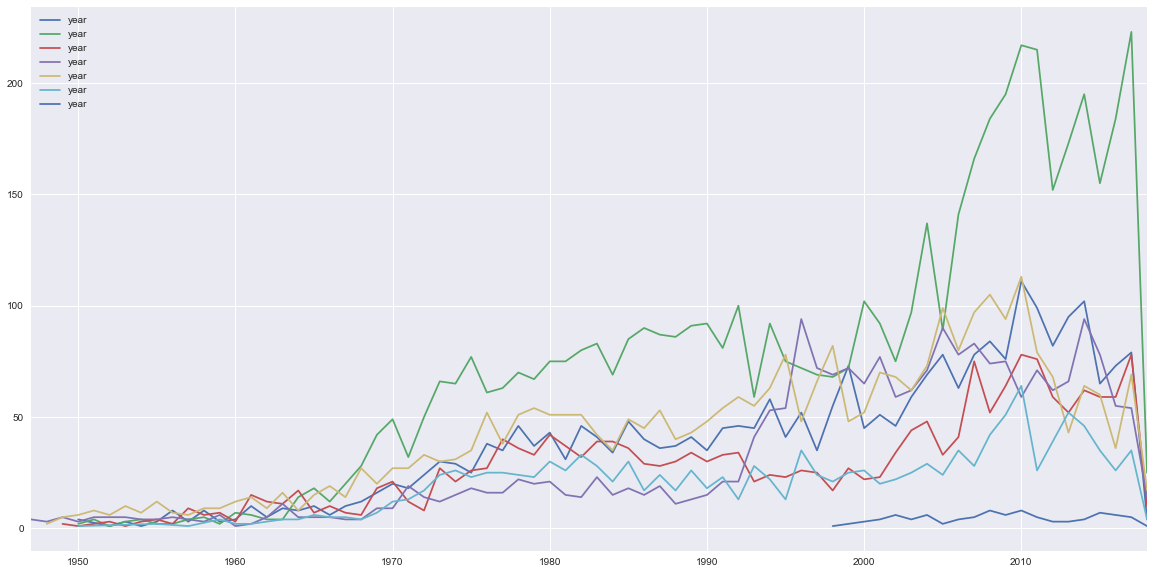

In [109]:
for i in rel_data['regionname'].unique():
    x = pd.value_counts(rel_data[rel_data['regionname']==i]['year']).sort_index()
    if(x.any()):
        x.plot()
plt.legend()       
plt.show()

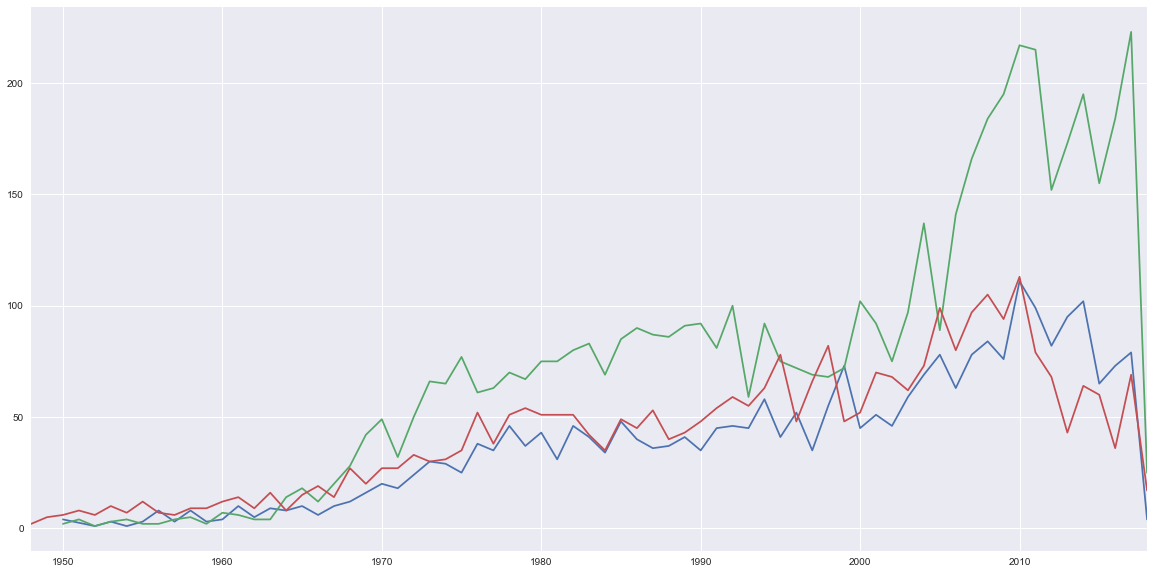

In [116]:
pd.value_counts(rel_data[rel_data['regionname']=='East Asia and Pacific']['year']).sort_index().plot()
pd.value_counts(rel_data[rel_data['regionname']=='Africa']['year']).sort_index().plot()
pd.value_counts(rel_data[rel_data['regionname']=='Latin America and Caribbean']['year']).sort_index().plot()

plt.show()


/Users/vaidehidalmia/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match

In [125]:
rel_data.head()

,id,regionname,countryname,lendinginstr,projectstatusdisplay,boardapprovaldate,lendprojectcost,sector,mjsector,project_name,year,month
0,P160543,East Asia and Pacific,Socialist Republic of Vietnam;Socialist Republ...,Investment Project Financing,NaN,2018-05-31,3000000.0,NaN,NaN,Quality Deaf Education in Vietnam,2018.0,5.0
1,P163515,Africa,Republic of Uganda;Republic of Uganda,Program-for-Results,Active,2018-05-15,360000000.0,NaN,NaN,Uganda Support to Municipal Infrastructure Dev...,2018.0,5.0
2,P160504,East Asia and Pacific,Republic of Palau;Republic of Palau,Investment Project Financing,NaN,2018-03-30,1550000.0,NaN,NaN,Palau: ICT Sector Technical Assistance,2018.0,3.0
3,P157987,South Asia,People's Republic of Bangladesh;People's Repub...,Investment Project Financing,Active,2018-03-29,18000000.0,NaN,NaN,National Strategy for Development of Statistic...,2018.0,3.0
4,P158364,South Asia,Nepal;Nepal,Investment Project Financing,Active,2018-03-29,72000000.0,NaN,NaN,NP Modernization of Rani Jamara Kulariya Irrig...,2018.0,3.0


In [126]:
rel_data.to_csv("rel_data.csv")

In [128]:
rel_data['lendinginstr'].unique()

array(['Investment Project Financing', 'Program-for-Results',
       'Development Policy Lending', nan, 'Specific Investment Loan',
       'Technical Assistance Loan', 'Emergency Recovery Loan',
       'Adaptable Program Loan', 'Sector Investment and Maintenance Loan',
       'Financial Intermediary Loan', 'Learning and Innovation Loan',
       'Programmatic Structural Adjustment Loan',
       'Structural Adjustment Loan', 'Sector Adjustment Loan',
       'Debt and Debt Service Reduction Loan', 'UNIDENTIFIED',
       'Poverty Reduction Support Credit', 'Rehabilitation Loan',
       'Special Structural Adjustment Loan'], dtype=object)

In [129]:
rel_data['year'].unique()

array([ 2018.,  2017.,  2016.,  2015.,  2014.,  2013.,  2012.,  2011.,
        2010.,  2009.,  2008.,  2007.,  2006.,  2005.,  2004.,  2003.,
        2002.,  2001.,  2000.,  1999.,  1998.,  1997.,  1996.,  1995.,
        1994.,  1993.,  1992.,  1991.,  1990.,  1989.,  1988.,  1987.,
        1986.,  1985.,  1984.,  1983.,  1982.,  1981.,  1980.,  1979.,
        1978.,  1977.,  1976.,  1975.,  1974.,  1973.,  1972.,  1971.,
        1970.,    nan,  1969.,  1968.,  1967.,  1966.,  1965.,  1964.,
        1963.,  1962.,  1961.,  1960.,  1959.,  1958.,  1957.,  1956.,
        1955.,  1954.,  1953.,  1952.,  1951.,  1950.,  1949.,  1948.,
        1947.])